Getting the Task 2 data file

In [127]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#https://drive.google.com/file/d/13hOJmMQvd8qEx1uZbQzC_14Uv98omW6z/view?usp=sharing
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '13hOJmMQvd8qEx1uZbQzC_14Uv98omW6z'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('Task2.mat')  
# print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [128]:
#Install this if haven't done already
# !pip install numpy

In [129]:
import numpy as np
import scipy.io
#Getting the file
mat = scipy.io.loadmat('Task2.mat')

Checking the shapes of the data matrices

In [130]:
mat['A'].shape

(5, 5, 256)

In [131]:
mat['Image'].shape

(5, 5)

In [132]:
A = mat['A']
y = mat['Image']

Checkig the data

In [133]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
# img = cv2.imread(y)
cv2_imshow(y)

In [134]:
y

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

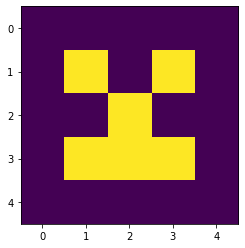

In [135]:
plt.imshow(y,interpolation='nearest')
plt.show()

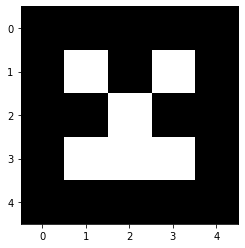

In [136]:
plt.imshow(y,cmap='gray', vmin = 0, vmax = 1,interpolation='none')
plt.show()

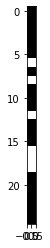

In [137]:
y_resized = y.reshape(y.shape[0]*y.shape[1],1)
plt.imshow(y_resized,cmap='gray', vmin = 0, vmax = 1,interpolation='none')
plt.show()

In [138]:
A

array([[[ 0.2       ,  0.20614266,  0.21488617, ...,  0.2735444 ,
          0.24882771,  0.18057364],
        [ 0.2       ,  0.20614266,  0.21488617, ..., -0.37438422,
         -0.34055593, -0.24714058],
        [ 0.2       ,  0.20614266,  0.21488617, ...,  0.24864487,
          0.22617802,  0.16413682],
        [ 0.2       ,  0.20614266,  0.21488617, ..., -0.32554203,
         -0.29612698, -0.2148986 ],
        [ 0.2       ,  0.20614266,  0.21488617, ...,  0.17773699,
          0.16167718,  0.11732872]],

       [[ 0.2       ,  0.17057094,  0.17371166, ..., -0.23140237,
         -0.2715757 , -0.24714058],
        [ 0.2       ,  0.17057094,  0.17371166, ...,  0.3167069 ,
          0.37168978,  0.33824686],
        [ 0.2       ,  0.17057094,  0.17371166, ..., -0.21033884,
         -0.24685537, -0.22464447],
        [ 0.2       ,  0.17057094,  0.17371166, ...,  0.27538929,
          0.3231991 ,  0.29411915],
        [ 0.2       ,  0.17057094,  0.17371166, ..., -0.15035498,
         -0.17

In [139]:
A_resized = A.reshape(25,256)
A_resized

array([[ 0.2       ,  0.20614266,  0.21488617, ...,  0.2735444 ,
         0.24882771,  0.18057364],
       [ 0.2       ,  0.20614266,  0.21488617, ..., -0.37438422,
        -0.34055593, -0.24714058],
       [ 0.2       ,  0.20614266,  0.21488617, ...,  0.24864487,
         0.22617802,  0.16413682],
       ...,
       [ 0.2       , -0.33608305, -0.32602633, ..., -0.17917233,
        -0.01969672,  0.10664881],
       [ 0.2       , -0.33608305, -0.32602633, ...,  0.23458407,
         0.02578823, -0.13963156],
       [ 0.2       , -0.33608305, -0.32602633, ..., -0.12807645,
        -0.01407966,  0.07623499]])

Compiling functions obtained in Task1 into a clean, bigger class

In [140]:
class obtain_sparse:
  def __init__(self, A, y, iter = 20, threshold_val = 0.25):
    self.A = A
    self.y = y
    self.R = y
    self.norm_R = np.squeeze(np.linalg.norm(self.R))
    # self.threshold_val = self.norm_R + 1
    self.threshold_val = threshold_val
    self.count_val = iter
  
    #Using Matching pursuit
  def find_x_mp(self):
    #A has shape (m,N)
    #x has shape (N,1)
    #y has shape (m,1)
    N = self.A.shape[1]
    m = self.A.shape[0]
    #gi where i = 1 to N are the columns in A.T
    #Normalizing the columns
    # A_normed = (self.A -self.A.min(0)) / self.A.ptp(0)
    #initialization
    R = self.R
    count = 1
    count_val = self.count_val
    norm_R = self.norm_R
    threshold = self.threshold_val
    i_list = []
    a_list =[]
    ai_list=[]
    while(norm_R>threshold and count<count_val):
      for i in range(m):
        gi =self.A[:,i].reshape(m,1)
        if(i==0):
          max = abs(np.dot(self.A[:,0].T, R))
          i_max =0
        inner_product = np.squeeze(abs(np.dot(gi.T, R)))
        # print(inner_product)
        if(inner_product>max):
          max = inner_product
          i_max = i
      
      gn = self.A[:,i_max].reshape(m,1)
      an = np.dot(gn.T, R)
      R= R - an*gn
      norm_R = np.squeeze(np.linalg.norm(R))
      count=count+1
      a_list.append(an)
      i_list.append(i_max)
      ai_list.append((an,i_max))

    return a_list, i_list, ai_list

  def construct_x(self, ai_list,N):
    x = np.zeros((N,1))
    for tuple_ai in ai_list:
      x[tuple_ai[1]] += np.squeeze(tuple_ai[0])
    self.x = x
    return x
  
  def get_y_pred(self):
    self.y_pred = np.dot(self.A,self.x)
    return self.y_pred

  def calc_error(self):
    self.error = np.linalg.norm(self.y_pred-self.y)
    return self.error


For 5 iterations:

In [141]:
Obtain_sparse = obtain_sparse(A_resized,y_resized, 5, 0.25)
a_list, i_list, ai_list = Obtain_sparse.find_x_mp()
N = A_resized.shape[1]
x = Obtain_sparse.construct_x(ai_list,N)
y_pred = Obtain_sparse.get_y_pred()
error = Obtain_sparse.calc_error()

error

In [142]:
error

1.7926371004113848

Predicted y for 5 iterations:

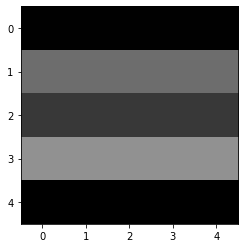

In [143]:
y_pred_resize = y_pred.reshape(y.shape)
plt.imshow(y_pred_resize,cmap='gray', vmin = 0, vmax = 1,interpolation='none')
plt.show()

For 20 iterations:

In [144]:
Obtain_sparse = obtain_sparse(A_resized,y_resized, 20, 0.25)
a_list, i_list, ai_list = Obtain_sparse.find_x_mp()
N = A_resized.shape[1]
x = Obtain_sparse.construct_x(ai_list,N)
y_pred = Obtain_sparse.get_y_pred()
error = Obtain_sparse.calc_error()

error

In [145]:
error

1.7573145762393045

Predicted y for 20 iterations:

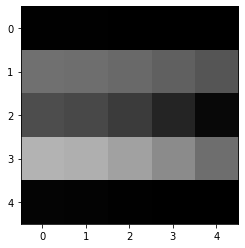

In [146]:
y_pred_resize = y_pred.reshape(y.shape)
plt.imshow(y_pred_resize,cmap='gray', vmin = 0, vmax = 1,interpolation='none')
plt.show()

**Observations:** <br>
 - Looks like mp algorithm is simple for this problem
 - On doing more than 20 iterations, y_pred doesn't have much improvement
 - Otherwise, there could be a problem with my code
 - One possible solution to try is normalizing